<a href="https://colab.research.google.com/github/cgree136/D3/blob/main/Homework1Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Learning Rate: 0.1
Learning Rate: 0.05
Learning Rate: 0.01


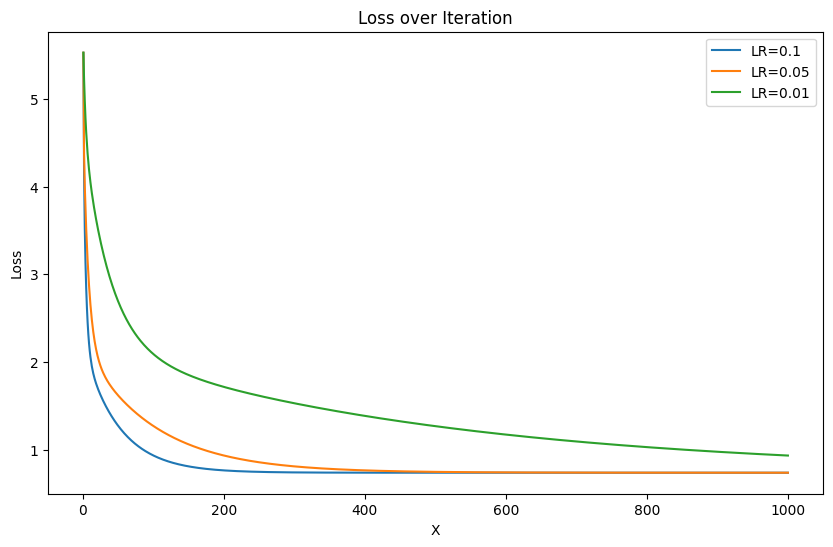

Best Linear Model (Theta): [ 5.31393577 -2.00368658  0.53260157 -0.26556795]
Best Learning Rate: 0.1
Final Loss (Best Model): 0.7384642444783825
Predictions for new values:
Input 1: [1 1 1] => Predicted Y: 3.5772828177319926
Input 2: [2 0 4] => Predicted Y: 0.24429082475948682
Input 3: [3 2 1] => Predicted Y: 0.10251123321230171


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

path ="/content/drive/MyDrive/D3.csv"
data = pd.read_csv(path)

# Extract explanatory variables (X1, X2, X3) and the dependent variable (Y)
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

# Function to perform gradient descent
def gradient_descent(X, Y, theta, alpha, num_iterations):
    m = len(Y)
    cost_history = []

    for _ in range(num_iterations):
        error = X.dot(theta) - Y
        gradient = X.T.dot(error) / m
        theta -= alpha * gradient
        cost = np.sum(error**2) / (2 * m)
        cost_history.append(cost)

    return theta, cost_history

learning_rates = [0.1, 0.05, 0.01]  # Explore different learning rates

best_model = None
best_loss = float('inf')


for learning_rate in learning_rates:
    print(f"Learning Rate: {learning_rate}")

    # Initialize parameters (theta) to zeros
    theta = np.zeros(4)  # For X1, X2, X3, and bias term
    X_with_bias = np.c_[np.ones(len(X)), X]  # Add a column of ones for bias term
    num_iterations = 1000
    theta, cost_history = gradient_descent(X_with_bias, Y, theta, learning_rate, num_iterations)

    # Plot loss over the iteration
    plt.plot(range(1, num_iterations + 1), cost_history, label=f"LR={learning_rate}")

    # Compare the loss to find the best model
    if cost_history[-1] < best_loss:
        best_loss = cost_history[-1]
        best_model = theta
        best_learning_rate = learning_rate

# Plot loss curve
plt.xlabel("X")
plt.ylabel("Loss")
plt.title("Loss over Iteration")
plt.legend()
plt.show()

# Report the best linear model
print(f"Best Linear Model (Theta): {best_model}")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Final Loss (Best Model): {best_loss}")

# Predict the value of Y for new (X1, X2, X3) values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
X_new = np.c_[np.ones(3), new_values]
predictions = X_new.dot(best_model)
print(f"Predictions for new values:")
for i, new_value in enumerate(new_values):
    print(f"Input {i + 1}: {new_value} => Predicted Y: {predictions[i]}")
